#### import libraries

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings('ignore')



#### Loading the dataset

In [68]:
df=pd.read_csv(r"D:\all file\hotel_bookings.csv")

In [69]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [72]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [74]:
df.shape

(119390, 32)

In [76]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [80]:
# df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format="%d/%m/%Y")

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)
# 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [84]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [86]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [88]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [90]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [94]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

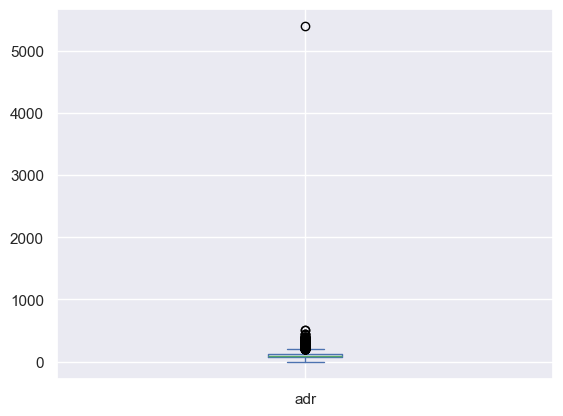

In [96]:
df['adr'].plot(kind='box')

#### Remove Outlier

In [99]:
df=df[df['adr']<5000]

<Axes: >

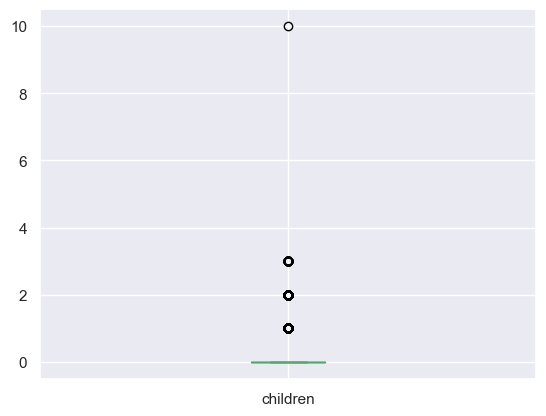

In [101]:
df['children'].plot(kind='box') #outliers in children col


<Axes: >

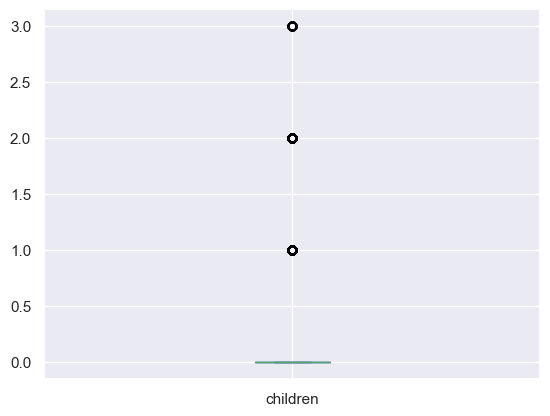

In [103]:
df=df[df['children']<6] #removing the outlier

df['children'].plot(kind='box') #checking after removing

<Axes: >

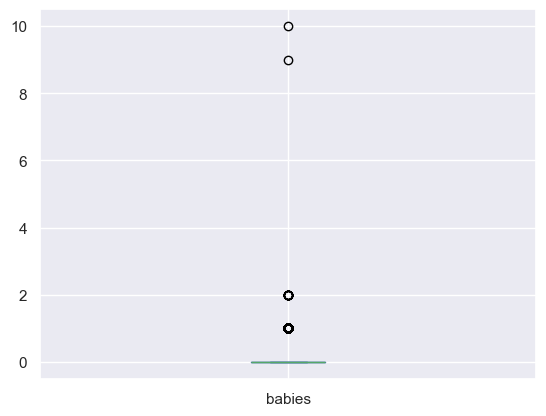

In [105]:
df['babies'].plot(kind='box')

<Axes: >

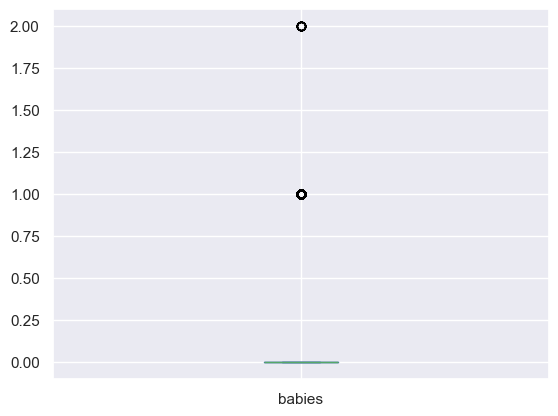

In [107]:
df=df[df['babies']<8] #removing
df['babies'].plot(kind='box') #checking after removing

In [110]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894
mean,0.371348,104.313784,2016.157678,27.166737,15.800907,0.928878,2.502111,1.858395,0.104126,0.007788,0.032012,0.087145,0.131638,0.221147,2.330833,101.958626,0.061887,0.571686,2016-07-30 07:50:25.666560
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.904302,0.707455,13.589887,8.780407,0.996181,1.900065,0.578580,0.398146,0.089238,0.176032,0.845883,1.484697,0.652764,17.630744,48.091689,0.244176,0.792686,NaN


#### data analysis and visualization 

is_canceled
0    0.628652
1    0.371348
Name: proportion, dtype: float64


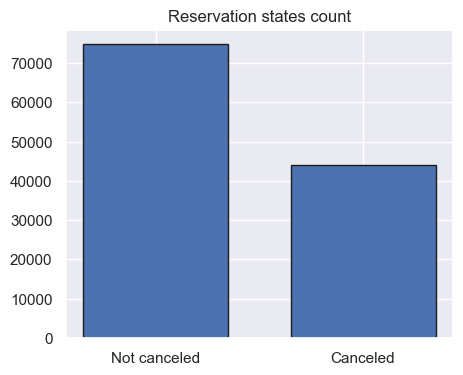

In [113]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
plt.figure(figsize=(5,4))
plt.title('Reservation states count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=.7)
plt.show()


Data types after conversion:
object
object
Legend labels: [<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]


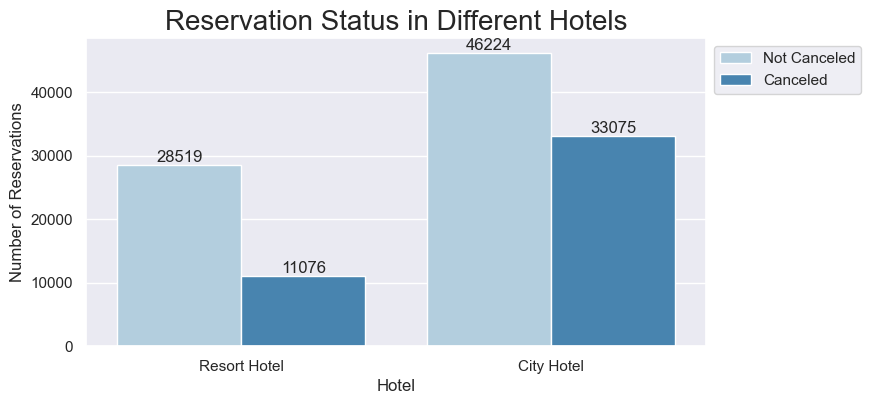

In [115]:

df['hotel'] = df['hotel'].astype(str)
df['is_canceled'] = df['is_canceled'].astype(str)

# Check the data types again after conversion
print("Data types after conversion:")
print(df['hotel'].dtype)
print(df['is_canceled'].dtype)

plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

# Get legend labels and handles
legend_labels, _ = ax1.get_legend_handles_labels()
print("Legend labels:", legend_labels)

# Set the legend with correct labels
ax1.legend(['Not Canceled', 'Canceled'], bbox_to_anchor=(1, 1))

plt.title("Reservation Status in Different Hotels", size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.show()


####  Bookings by different types of hotels

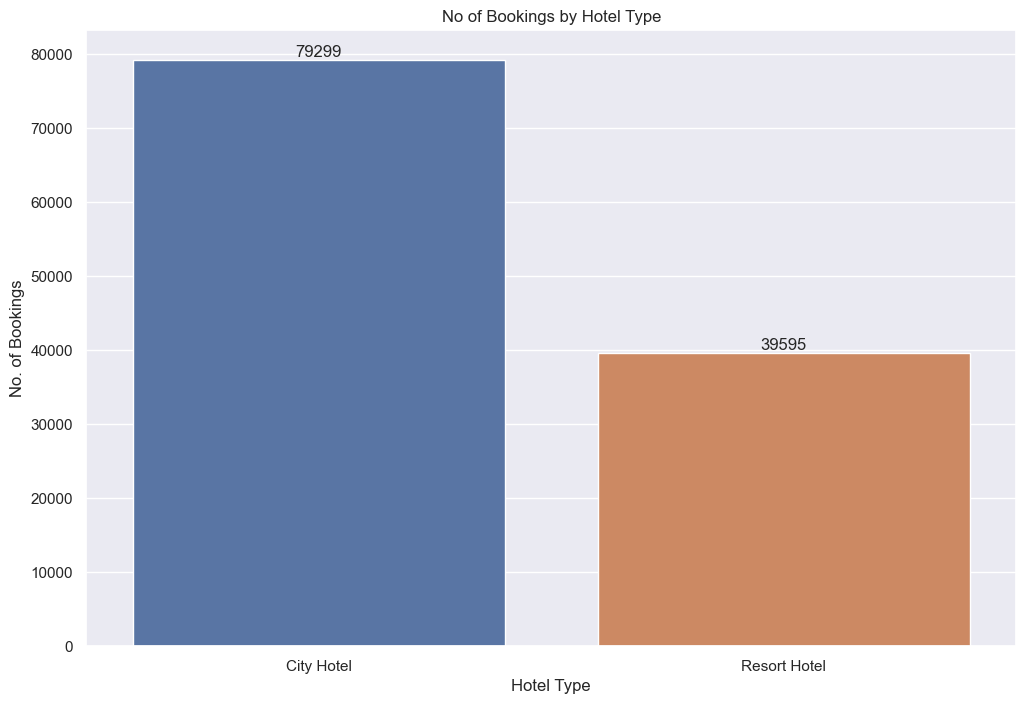

In [118]:


# Group by and count the number of bookings per hotel
d = df.groupby('hotel')['hotel'].count()

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=d.index, y=d)

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel("Hotel Type")
plt.ylabel("No. of Bookings")
plt.title("No of Bookings by Hotel Type")
plt.show()


#### Most booked accommodation type - Single, Couple, Family


In [121]:
# More bookings are made in City Hotels than Resort Hotel

In [204]:

df_not_canceled = df[df['is_canceled'] == 0]

# Select single, couple, multiple adults and family
single = df_not_canceled[(df_not_canceled.adults == 1) & (df_not_canceled.children == 0) & (df_not_canceled.babies == 0)]
couple = df_not_canceled[(df_not_canceled.adults == 2) & (df_not_canceled.children == 0) & (df_not_canceled.babies == 0)]
family = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

# Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0], couple.shape[0], family.shape[0]]

# Check if df_not_canceled is not empty to avoid division by zero
if df_not_canceled.shape[0] > 0:
    count_percent = [x / df_not_canceled.shape[0] * 100 for x in count]
else:
    count_percent = [0] * len(count)

# Creating a dictionary to make a DataFrame
d = {'names': names, 'count_percent': count_percent}
acc_type = pd.DataFrame(data=d)

print(acc_type)


                  names  count_percent
0                Single              0
1  Couple (No Children)              0
2      Family / Friends              0


In [206]:
# Showing the DataFrame
acc_type

,names,count_percent
0,Single,0
1,Couple (No Children),0
2,Family / Friends,0


Text(0, 0.5, 'Booking (%)')

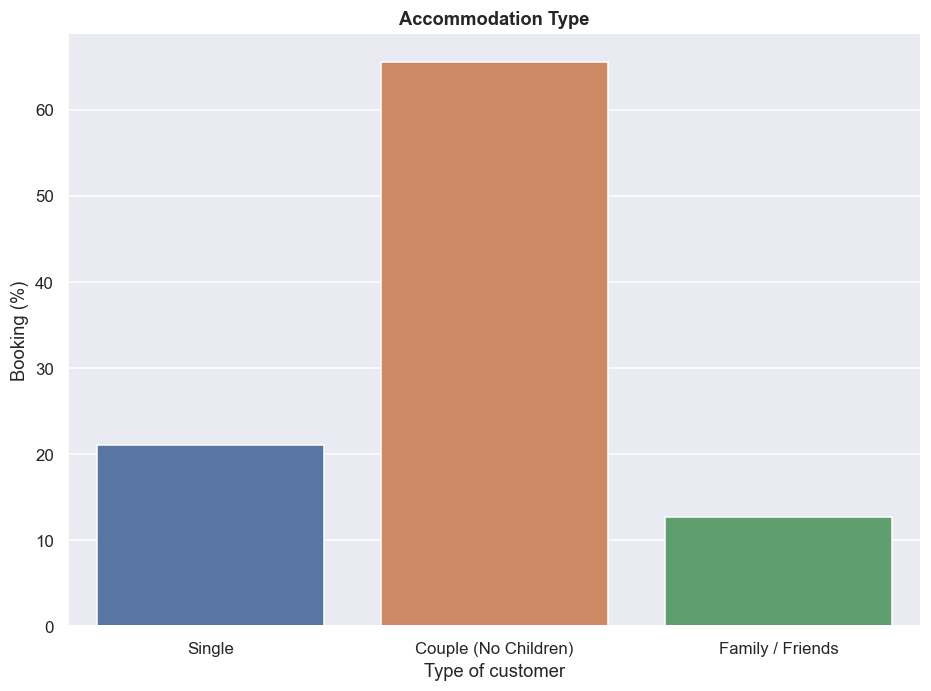

In [127]:
plt.figure(figsize = (10,7), dpi=110)
sns.barplot(data = acc_type, x = 'names', y = 'count_percent')
plt.title('Accommodation Type', weight = 'bold')
plt.xlabel('Type of customer')
plt.ylabel('Booking (%)')

 #### Counts of Cancelled vs Not-Cancelled Bookings in different types of hotels

Text(0, 0.5, 'count')

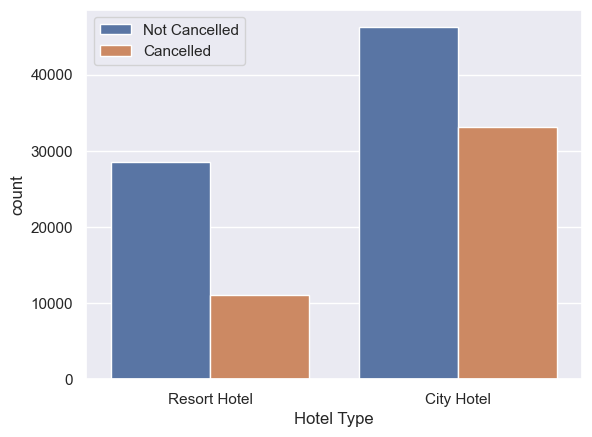

In [130]:

sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.legend(['Not Cancelled', 'Cancelled'])
plt.xlabel("Hotel Type")
plt.ylabel("count")
     


####  Booking by year & type of hotel


[2015 2016 2017]


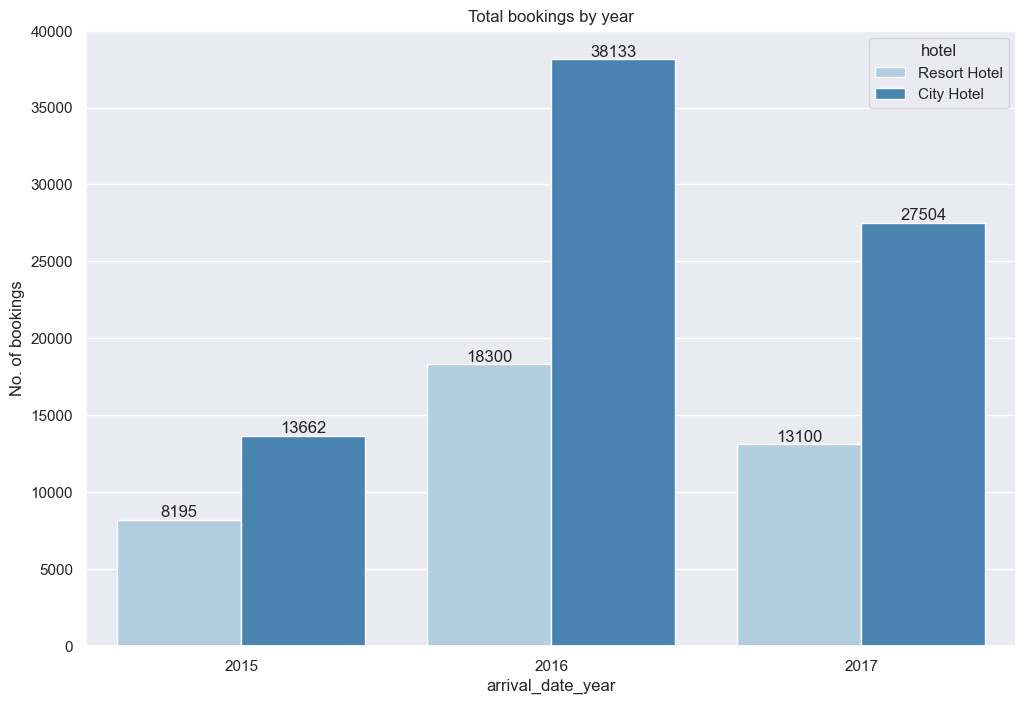

In [133]:

# import numpy as np 
# print(df['arrival_date_year'].unique())

# # Plotting
# sns.countplot(x='arrival_date_year', hue='hotel', data=df)
# plt.ylabel("No. of bookings")
# plt.title("Total bookings by year")
# plt.show()

print(df['arrival_date_year'].unique())

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette='Blues')

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.ylabel("No. of bookings")
plt.title("Total bookings by year")
plt.show()

#### No. of bookings by months of year

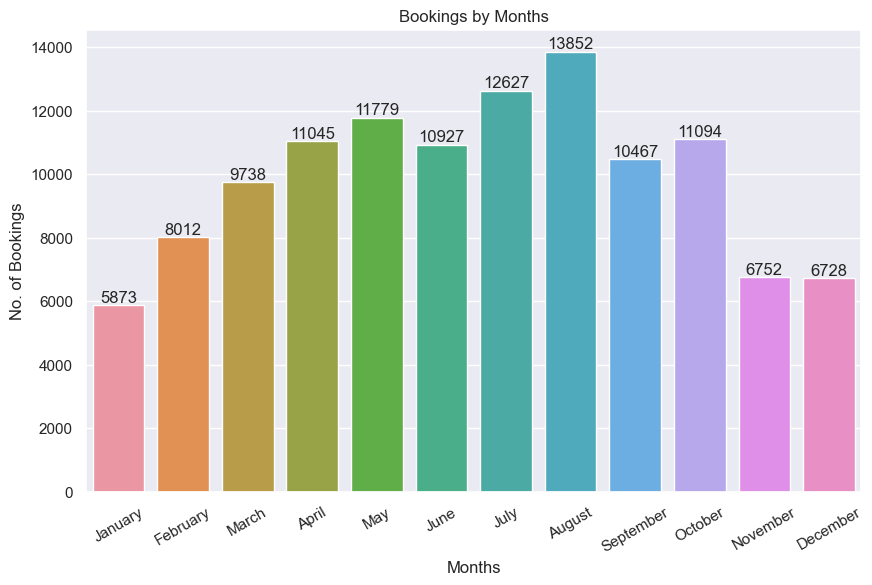

In [136]:

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Group by and count the number of bookings per month
d = df.groupby("arrival_date_month")["arrival_date_month"].count().reindex(months)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=d.index, y=d, order=months)

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by Months")
plt.show()
     

#### Deposit Types


In [209]:
# Percentage distribution of Deposite type
df['deposit_type'].value_counts(normalize=True) * 100

deposit_type
No Deposit    87.607449
Non Refund    12.256296
Refundable     0.136256
Name: proportion, dtype: float64

Text(0.5, 0, 'Deposit Type')

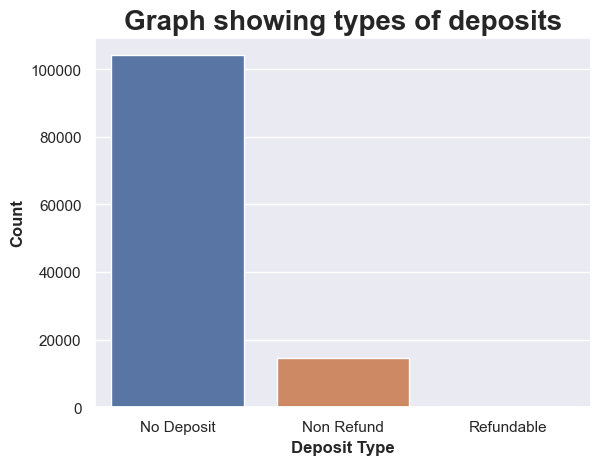

In [211]:
# Plotting the graph showing the count of different types of deposit
sns.countplot(data = df, x = 'deposit_type', order = df['deposit_type'].value_counts().index)
plt.title('Graph showing types of deposits', fontsize = 20 , weight= 'bold')
plt.ylabel('Count' , weight= 'bold')
plt.xlabel('Deposit Type', weight= 'bold' )

In [138]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [140]:
d = df['country'].value_counts()
d.describe()
     


count      177.000000
mean       671.717514
std       3930.652675
min          1.000000
25%          2.000000
50%         12.000000
75%         74.000000
max      48583.000000
Name: count, dtype: float64

 #### Booking Status by country


In [143]:
df['country'].unique()


array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

#### Top 10 countries by number of bookings


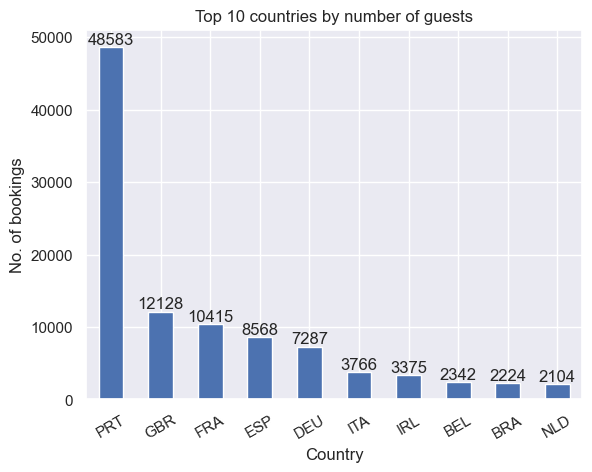

In [146]:

ax = d.sort_values(ascending=False)[:10].plot(kind='bar')

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("No. of bookings")
plt.title("Top 10 countries by number of guests")
plt.show()     

#### Booking type by country (Top 10)


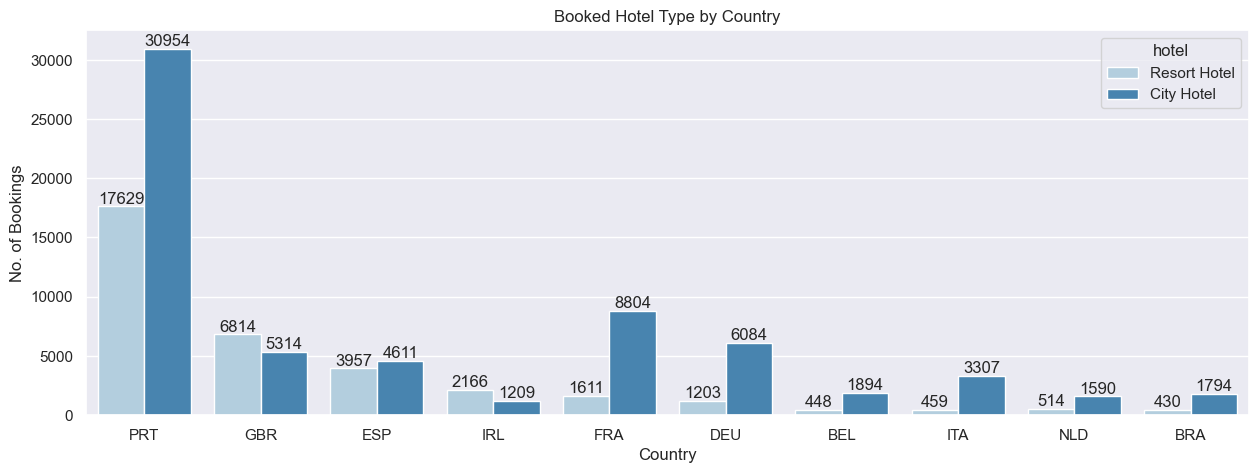

In [149]:
# d = df['country'].value_counts().sort_values(ascending=False)[:10]
# plt.figure(figsize=(15,5))
# sns.countplot(x='country', hue='hotel', data=df[df['country'].isin(d.index)])
# plt.xlabel("Country")
# plt.ylabel("No. of Bookings")
# plt.title("Booked Hotel type by country")
d = df['country'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(15, 5))
ax = sns.countplot(x='country', hue='hotel', data=df[df['country'].isin(d.index)], palette='Blues')

# Add values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel Type by Country")
plt.show()

#### Daily Rate by Hotel type


In [152]:
df['adr'].describe()


count    118894.000000
mean        101.958626
std          48.091689
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Daily Rate by hotel type')

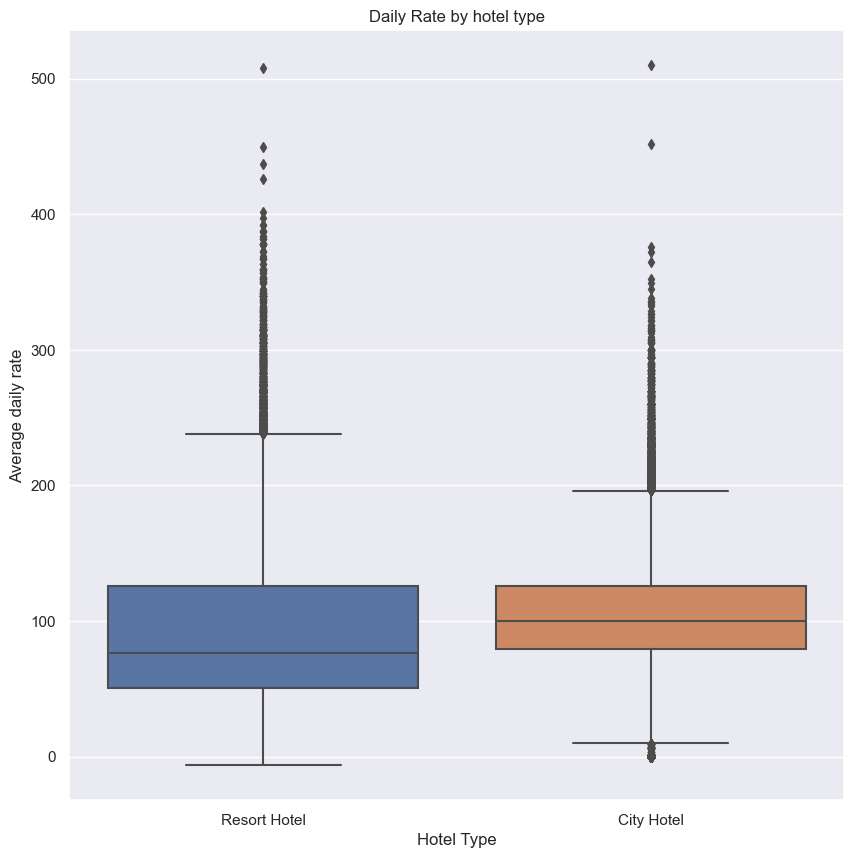

In [154]:
plt.figure(figsize=(10,10))
df2 = df.drop(df[df['adr']==5400].index, axis=0, inplace=False)  # Removed an extreme outlier (adr=5400) that made boxplot very squeezed to view
sns.boxplot(x='hotel', y='adr', data = df2)
plt.ylabel('Average daily rate')
plt.xlabel("Hotel Type")
plt.title("Daily Rate by hotel type")
     


In [156]:
# We can see that the avg daily rate for Resort Hotels are more spread compared to City
# Hotels although have lesser median rate.

Text(0.5, 1.0, 'Daily rate by hotel type')

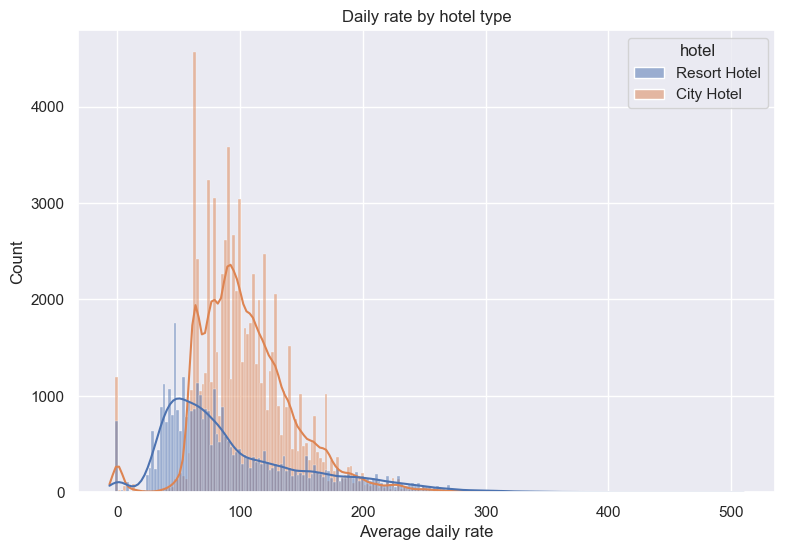

In [158]:
plt.figure(figsize=(9,6))
sns.histplot(x='adr', hue='hotel', data=df2, kde=True)
plt.xlabel("Average daily rate")
plt.title("Daily rate by hotel type")

In [159]:
df[df['adr']==5400]    # Removed Booking Row that is extreme outlier ('Average daily rate')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


####  Price variation over the year

In [162]:
d = df2.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)
d
     

,hotel,arrival_date_month,adr
4,City Hotel,January,82.628498
16,Resort Hotel,January,49.673157
3,City Hotel,February,85.088278
15,Resort Hotel,February,55.445661
7,City Hotel,March,91.821162
19,Resort Hotel,March,57.802130
0,City Hotel,April,111.311363
12,Resort Hotel,April,78.144752
20,Resort Hotel,May,78.820186
8,City Hotel,May,121.638560


Text(0.5, 1.0, 'Average Daily rate by months')

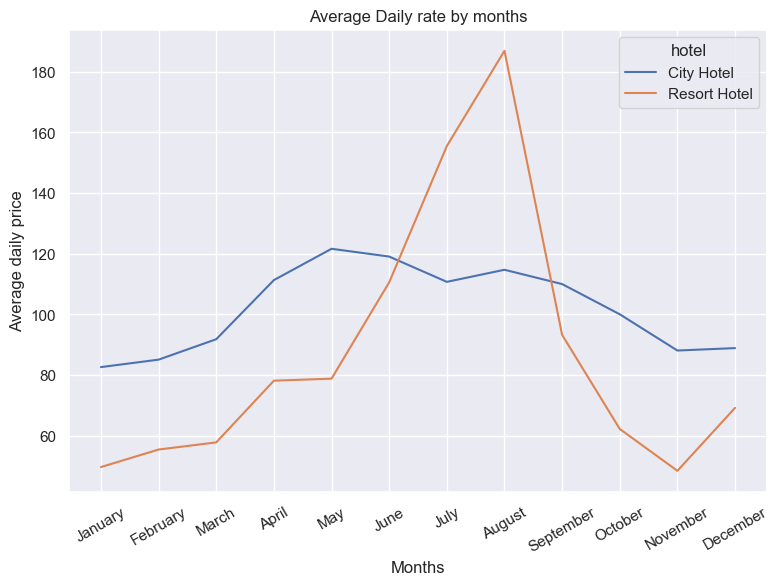

In [163]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=d)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")
     

#### Daily Rate by customer types

Text(0.5, 1.0, 'Daily rate by customer type')

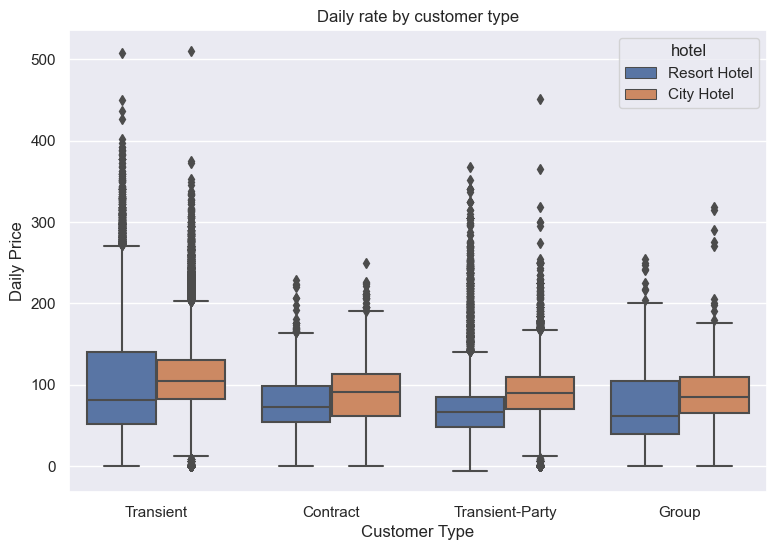

In [165]:
plt.figure(figsize=(9,6))
sns.boxplot(x='customer_type', y='adr', hue='hotel', data=df2)
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

####  Average Daily Rate trend over three years


In [171]:
def get_month(x):
  pre = ''
  if months.index(x)<9:
    pre = '0'
  return pre+str(months.index(x)+1)

def get_day(x):
  pre = ''
  if x<10:
    pre = '0'
  return pre+str(x)
     

df2['arrival_date'] = df2.arrival_date_year.apply(lambda x: str(x))+"-"+df2.arrival_date_month.apply(get_month)+"-"+df2.arrival_date_day_of_month.apply(get_day)
df2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


Text(0.5, 1.0, 'Average daily rate trend over three years')

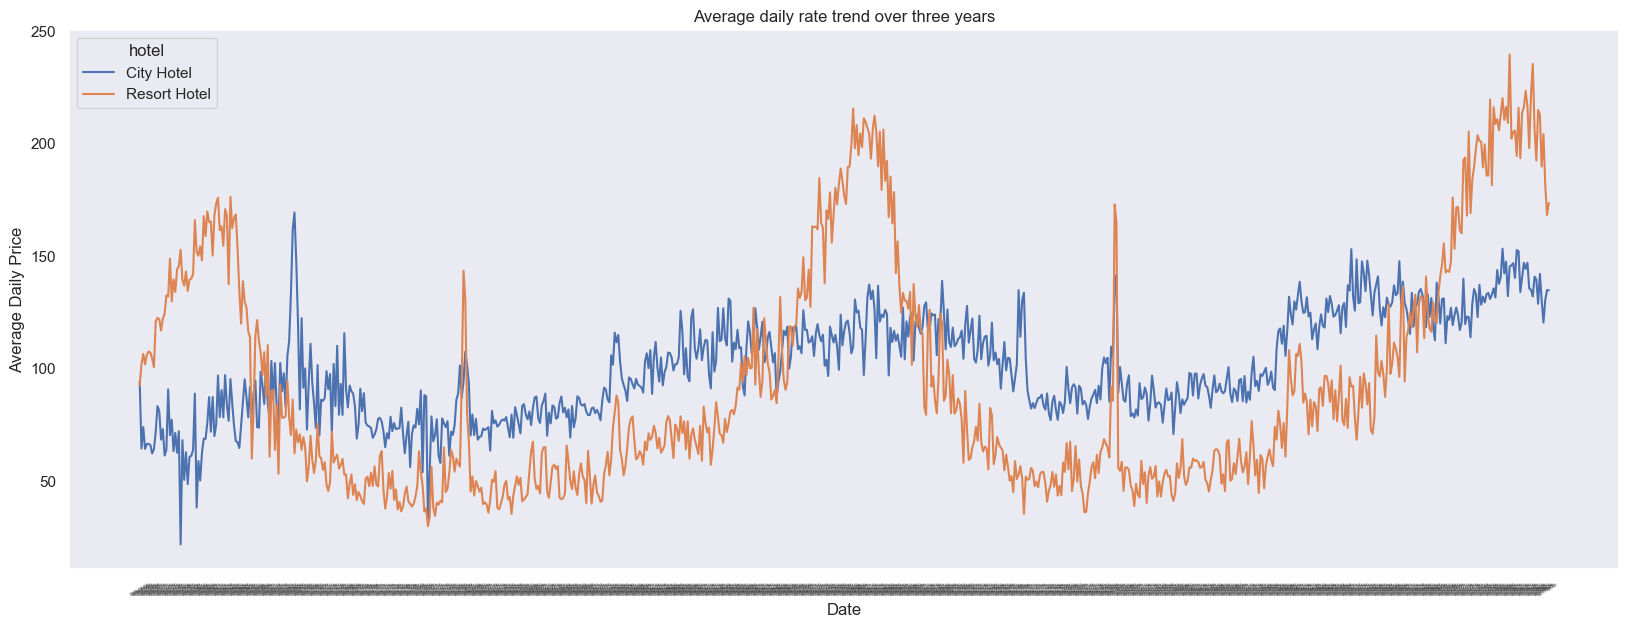

In [172]:
d = df2.groupby(['hotel','arrival_date'])['adr'].mean().reset_index().sort_values('arrival_date')
# fig = plt.figure(figsize=(20,7))
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(x='arrival_date', y='adr', hue='hotel', data=d)
plt.xlabel("Date")
plt.ylabel("Average Daily Price")
plt.grid()
# fig.autofmt_xdate()
p = plt.xticks(rotation=30)
ax.tick_params(axis='x', labelsize=3)
plt.title("Average daily rate trend over three years")
     


####  Bookings by market segment

Text(0.5, 1.0, 'Bookings by market segment')

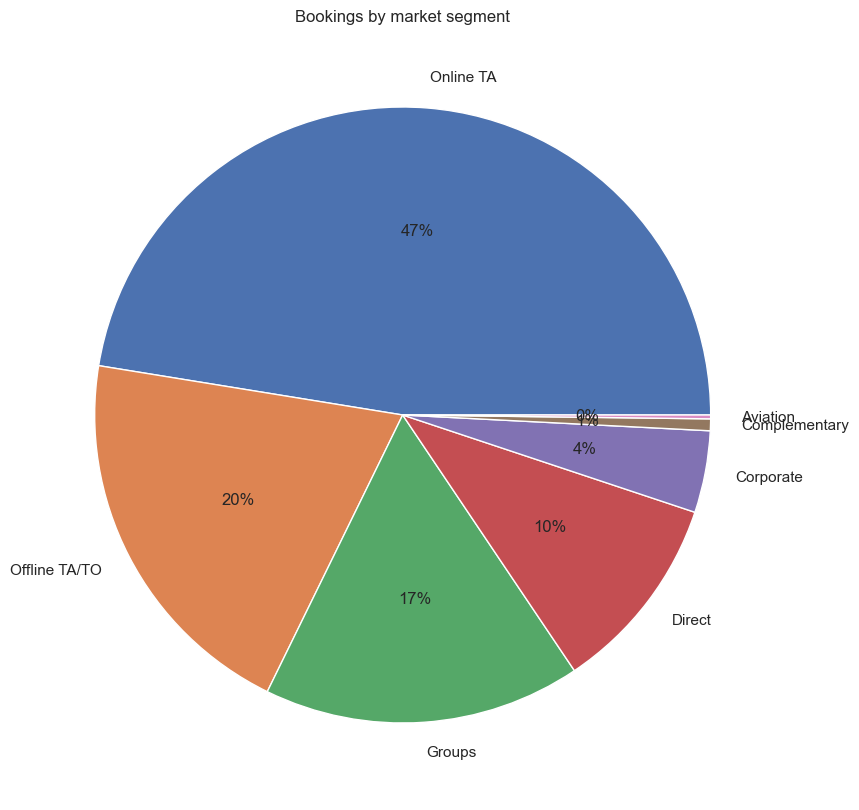

In [176]:
d = df['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by market segment")



####  Bookings by distribution channel

Text(0.5, 1.0, 'Bookings by distribution channel')

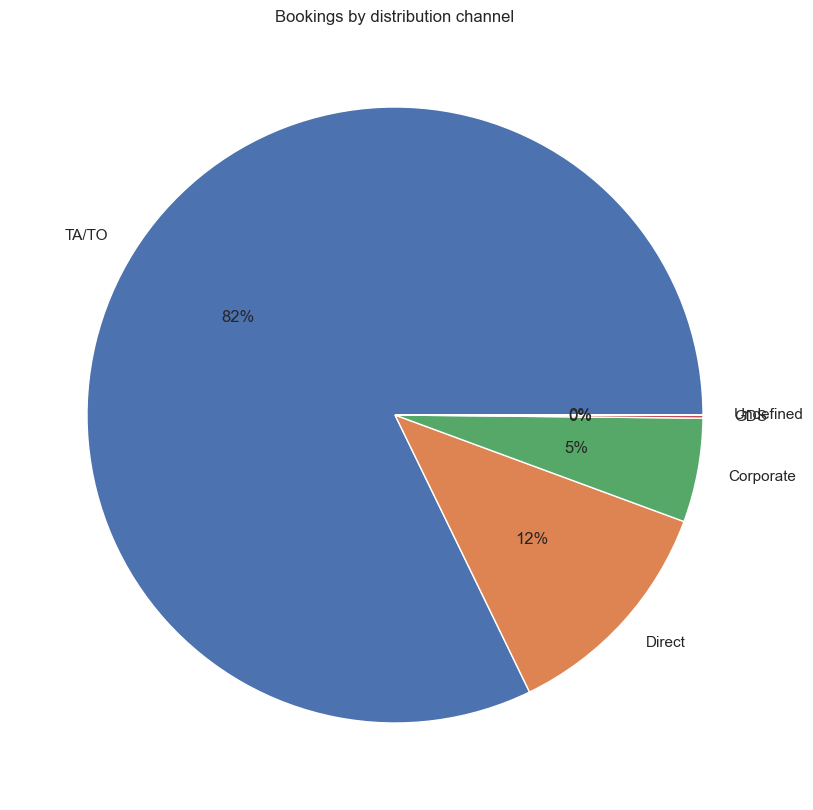

In [178]:

d = df['distribution_channel'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by distribution channel")
     

In [179]:
# Majority of bookings are done through TA/TO.

# 

#### Percentage of bookings with meals


Text(0.5, 1.0, 'Portion of bookings with meals and its type')

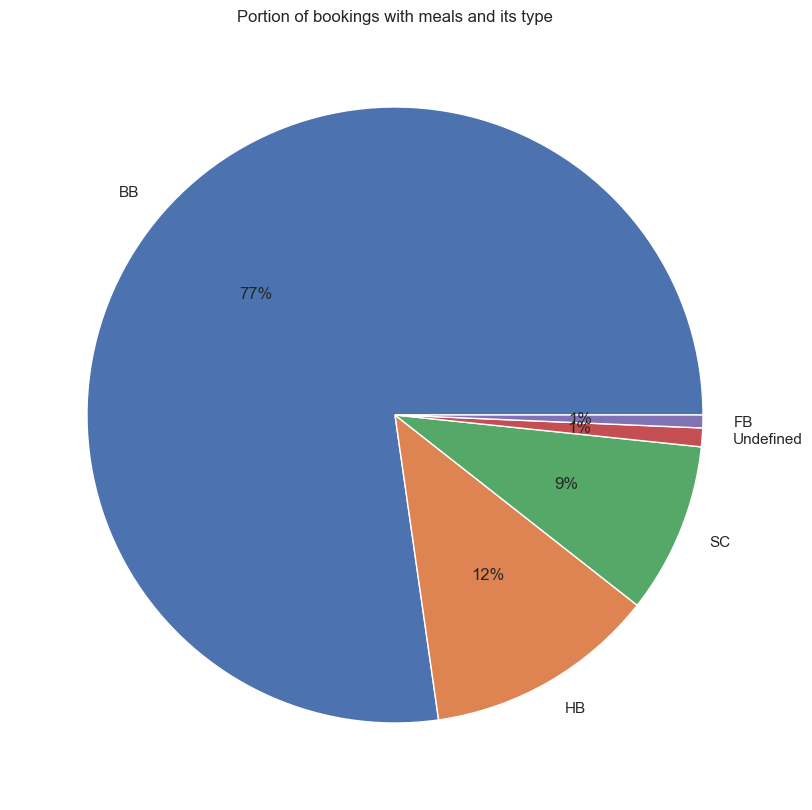

In [181]:
d = df['meal'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Portion of bookings with meals and its type")

#### Special Requests by customer type

Text(0.5, 1.0, 'Average number of special requests by customer type')

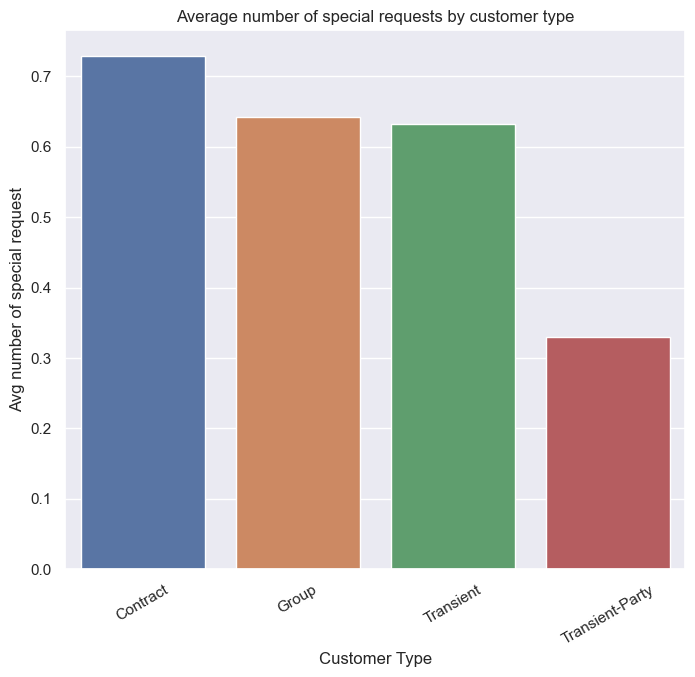

In [183]:
d = df.groupby("customer_type")['total_of_special_requests'].mean()
plt.figure(figsize=(8,7))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Customer Type")
plt.ylabel("Avg number of special request")
plt.title("Average number of special requests by customer type")

#### Hotel Preference by customer type


Text(0.5, 1.0, 'Hotel Preference by customer type')

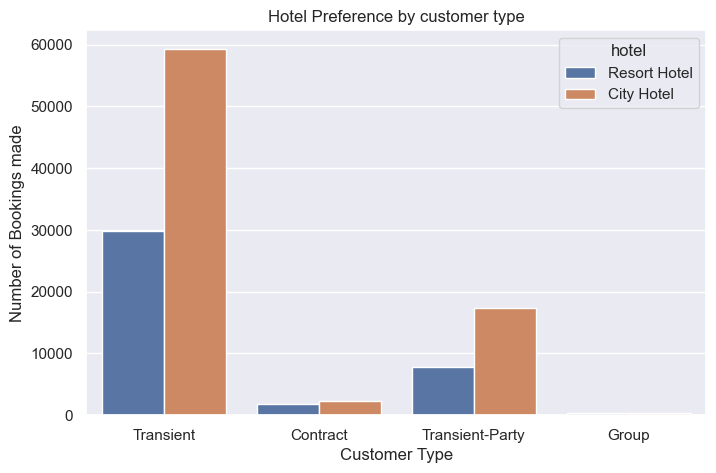

In [185]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='hotel', data=df)
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by customer type")
     

#### Cancellations

In [187]:
df.isna().sum()



hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

        hotel arrival_date_month  cancelled_bookings  total_bookings  \
0  City Hotel              April                3461            7476   
1  City Hotel             August                3598            8979   
2  City Hotel           December                1737            4129   
3  City Hotel           February                1901            4965   
4  City Hotel            January                1482            3735   

   cancellation_percentage  
0                46.294810  
1                40.071277  
2                42.068297  
3                38.288016  
4                39.678715  


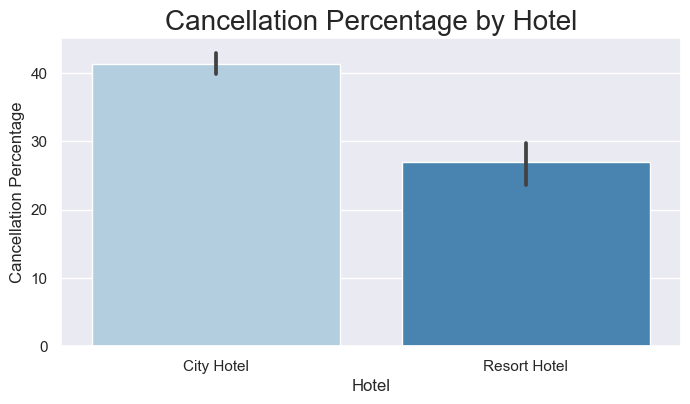

In [188]:


# Ensure the columns are of the correct type
df['is_canceled'] = df['is_canceled'].astype(int)

# Group by and aggregate
d = df.groupby(['hotel', 'arrival_date_month']).agg({'is_canceled': 'sum', 'meal': 'count'}).reset_index().rename(columns={'is_canceled': 'cancelled_bookings', 'meal': 'total_bookings'})

# Ensure the aggregated columns are of the correct type
d['cancelled_bookings'] = d['cancelled_bookings'].astype(int)
d['total_bookings'] = d['total_bookings'].astype(int)

# Calculate cancellation percentage
d['cancellation_percentage'] = (d['cancelled_bookings'] / d['total_bookings']) * 100

# Check the DataFrame
print(d.head())

# Plotting
plt.figure(figsize=(8, 4))
ax1 = sns.barplot(x='hotel', y='cancellation_percentage', data=d, palette='Blues')
plt.title("Cancellation Percentage by Hotel", size=20)
plt.xlabel('Hotel')
plt.ylabel('Cancellation Percentage')
plt.show()


Text(0.5, 1.0, 'Cancellations per month')

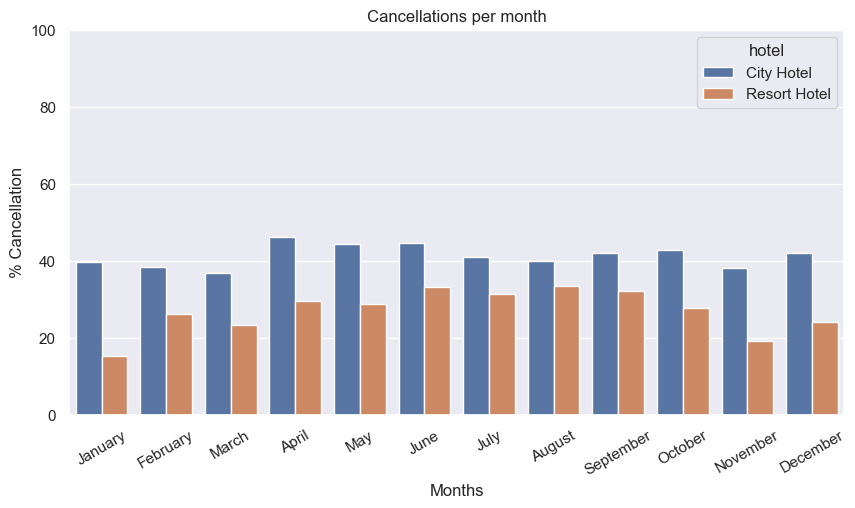

In [189]:
plt.figure(figsize=(10,5))
sns.barplot(x='arrival_date_month', y='cancellation_percentage', hue='hotel', data=d, order=months)
plt.ylim((0,100))
plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("% Cancellation")
plt.title("Cancellations per month")

#### Cancellations by market Segement 

object
object
Legend labels: [<BarContainer object of 7 artists>, <BarContainer object of 7 artists>]


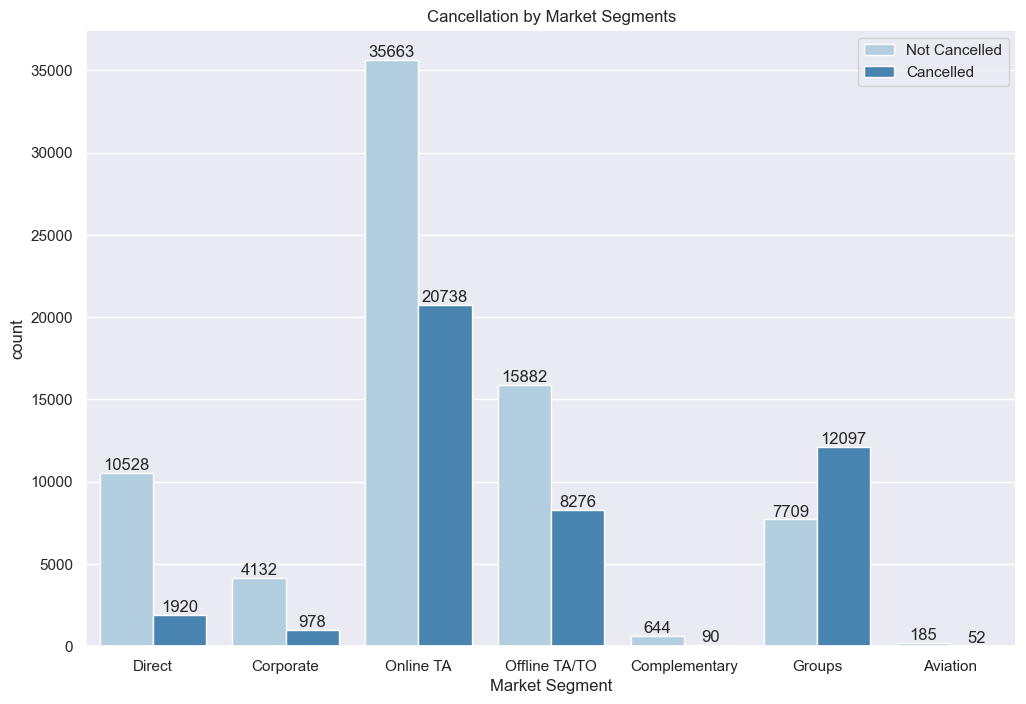

In [191]:


# Ensure the columns are of the correct type
df['market_segment'] = df['market_segment'].astype(str)
df['is_canceled'] = df['is_canceled'].astype(str)

# Check the data types again after conversion
print(df['market_segment'].dtype)
print(df['is_canceled'].dtype)

plt.figure(figsize=(12, 8))
ax = sns.countplot(x="market_segment", hue='is_canceled', data=df, palette='Blues')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')


# Get legend labels and handles
legend_labels, _ = ax.get_legend_handles_labels()
print("Legend labels:", legend_labels)

# Set the legend with correct labels
ax.legend(['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1, 1))

plt.xlabel("Market Segment")
plt.title("Cancellation by Market Segments")
plt.show()
